Autoregresive process of order 2 is characterized by the equation $Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + e_t$

In [11]:
import numpy as np

def AR_2_sequence(phis, n=10):
    assert(n > 2)
    Y_t = np.random.normal()
    last_Y = Y_t
    yield Y_t
    Y_t = last_Y*phis[1] + np.random.normal()
    yield Y_t
    for i in range(2,n):
        last_last_Y = last_Y
        last_Y = Y_t
        Y_t = last_Y*phis[0] + last_last_Y*phis[1] + np.random.normal()
        yield Y_t
         
def autocorr(samples, lag):
        l = len(samples)
        assert(lag < l)
        
        x_bar = np.mean(samples)
        xs = samples
        s = 0
        for i in range(len(xs)-lag):
            s+=(xs[i]-x_bar)*(xs[i+lag]-x_bar)
            
        xs_var2 = sum([(x-x_bar)**2 for x in xs])
        return s/xs_var2
    
# define the autocorrelation function
def acf(samples, lim=30):
    return [autocorr(samples, k+1) for k in list(range(lim))]


In [12]:
phis = [0.5, 0.25]
Y = list(AR_2_sequence(phis, n=120))

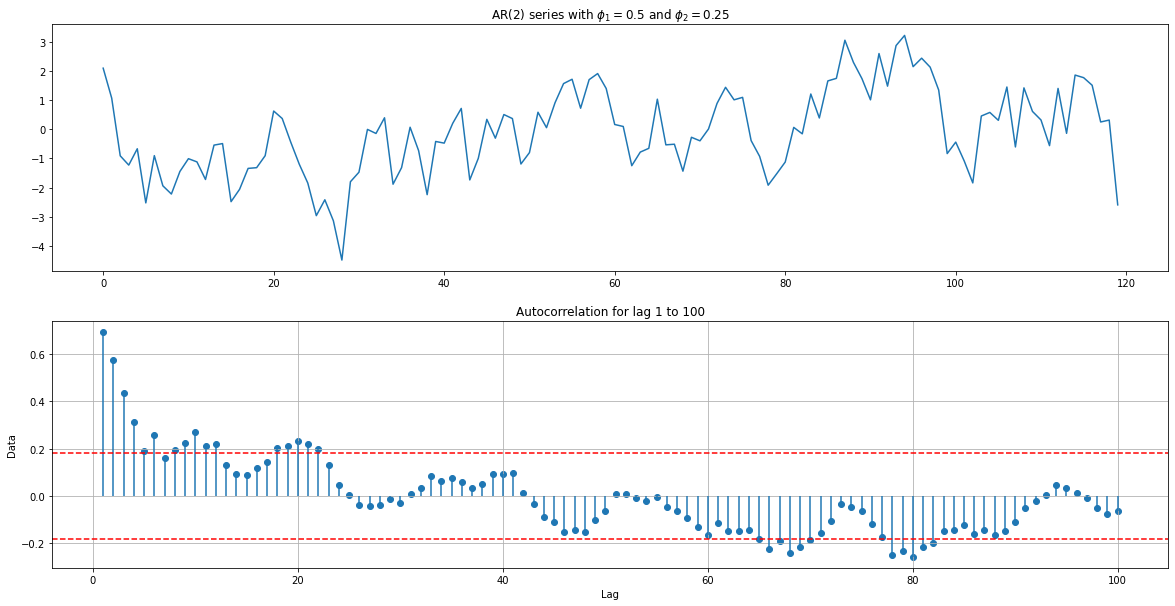

In [13]:
import matplotlib.pyplot as plt

x = [t for t in range(120)]
fig, ax = plt.subplots(2, 1, figsize=(20,10))
ax[0].set_title(f'AR(2) series with $\\phi_1={phis[0]}$ and $\\phi_2={phis[1]}$')
ax[0].plot(x, Y)

# now we can plot N lags using the acf
samples = Y
N = 100
xs = [k+1 for k in list(range(N))]
ys = acf(samples, lim=N)
ax[1].scatter(xs, ys)
ax[1].vlines(xs, 0, ys)
ax[1].axhline(2/np.sqrt(len(samples)), linestyle='--', color="r")
ax[1].axhline(-2/np.sqrt(len(samples)), linestyle='--', color="r")

plt.title(f'Autocorrelation for lag 1 to {N}')
plt.ylabel('Data')
plt.xlabel('Lag')
plt.grid(True)
    
plt.plot()

_ = plt.show()

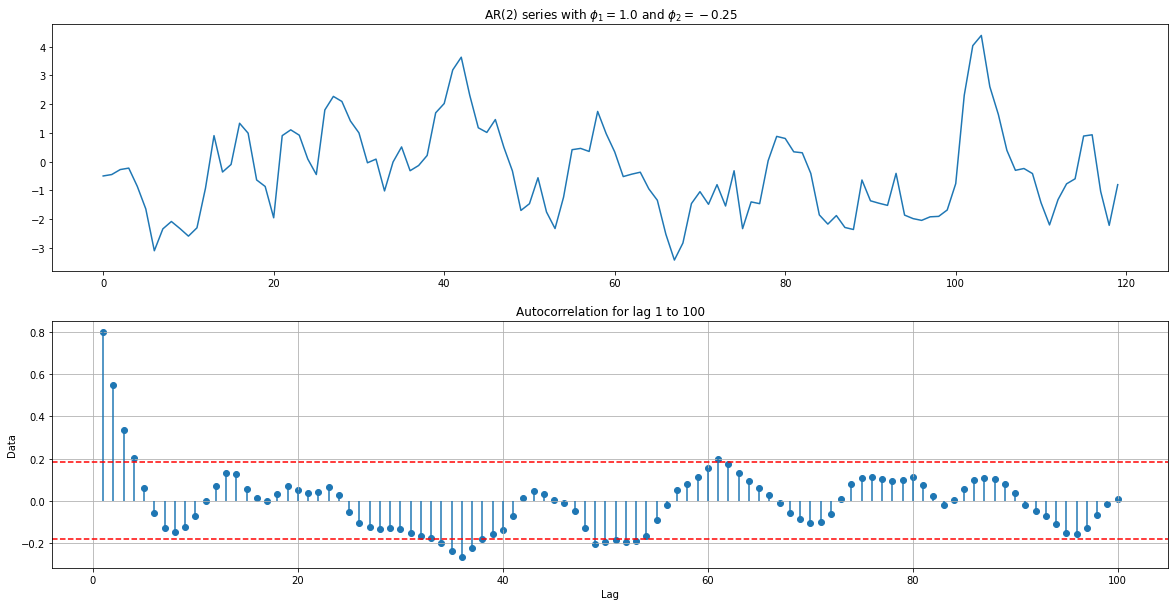

In [14]:
# Let's look at a few more samples...
phis = [1.0, -0.25]
Y = list(AR_2_sequence(phis, n=120))

fig, ax = plt.subplots(2, 1, figsize=(20,10))
ax[0].set_title(f'AR(2) series with $\\phi_1={phis[0]}$ and $\\phi_2={phis[1]}$')
ax[0].plot(x, Y)

# now we can plot N lags using the acf
samples = Y
N = 100
xs = [k+1 for k in list(range(N))]
ys = acf(samples, lim=N)
ax[1].scatter(xs, ys)
ax[1].vlines(xs, 0, ys)
ax[1].axhline(2/np.sqrt(len(samples)), linestyle='--', color="r")
ax[1].axhline(-2/np.sqrt(len(samples)), linestyle='--', color="r")

plt.title(f'Autocorrelation for lag 1 to {N}')
plt.ylabel('Data')
plt.xlabel('Lag')
plt.grid(True)
    
plt.plot()

_ = plt.show()

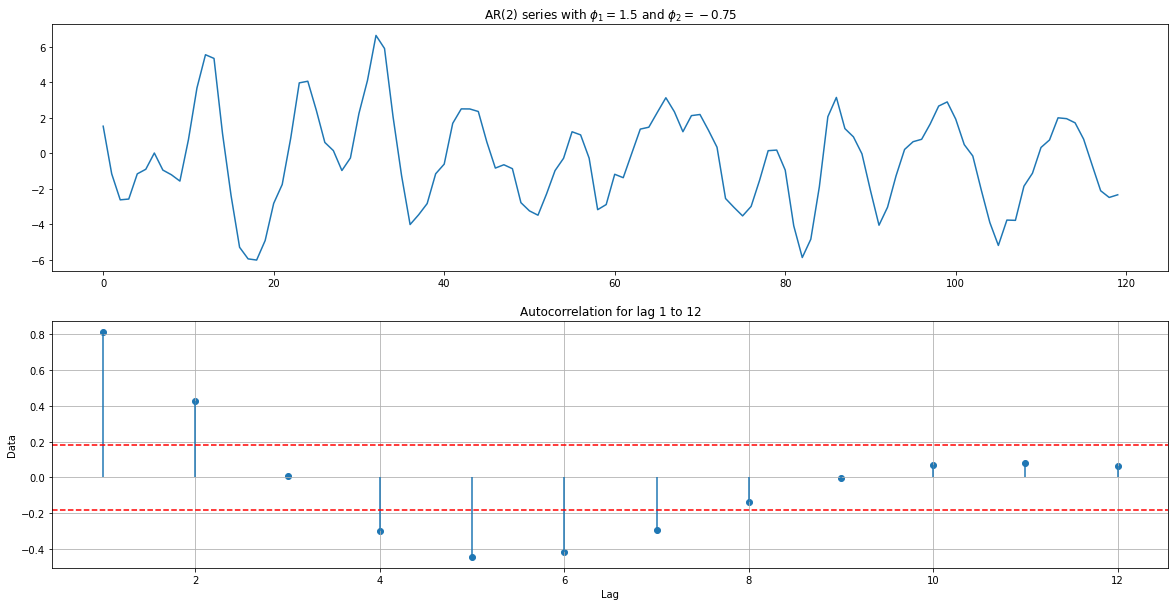

In [6]:
phis = [1.5, -0.75]
Y = list(AR_2_sequence(phis, n=120))

fig, ax = plt.subplots(2, 1, figsize=(20,10))
ax[0].set_title(f'AR(2) series with $\\phi_1={phis[0]}$ and $\\phi_2={phis[1]}$')
ax[0].plot(x, Y)

# now we can plot N lags using the acf
samples = Y
N = 12
xs = [k+1 for k in list(range(N))]
ys = acf(samples, lim=N)
ax[1].scatter(xs, ys)
ax[1].vlines(xs, 0, ys)
ax[1].axhline(2/np.sqrt(len(samples)), linestyle='--', color="r")
ax[1].axhline(-2/np.sqrt(len(samples)), linestyle='--', color="r")

plt.title(f'Autocorrelation for lag 1 to {N}')
plt.ylabel('Data')
plt.xlabel('Lag')
plt.grid(True)
    
plt.plot()

_ = plt.show()

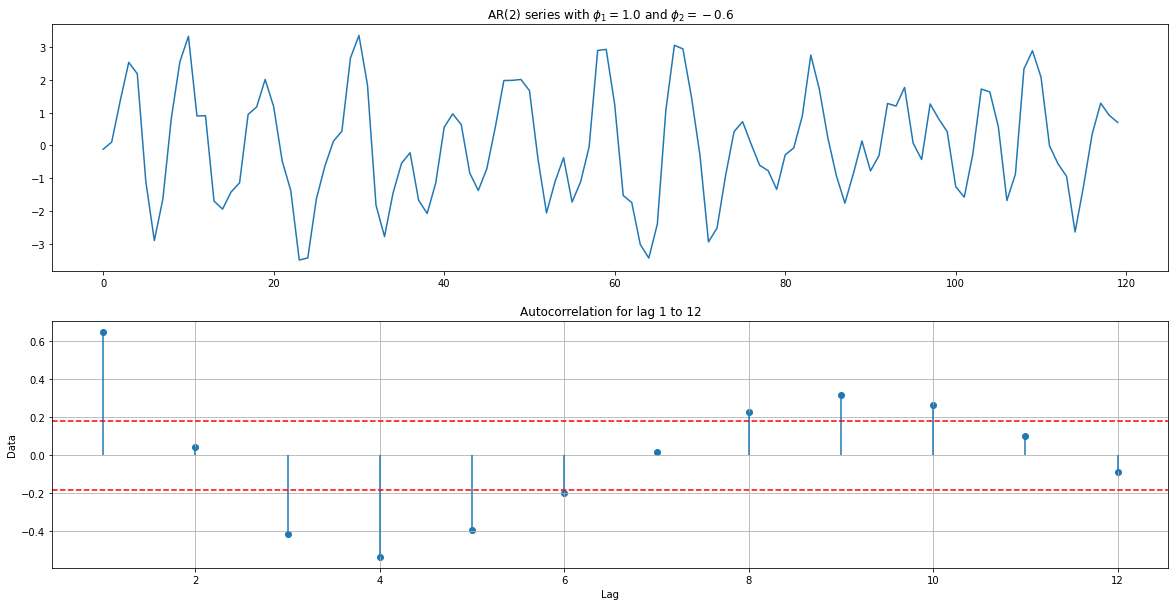

In [7]:
phis = [1.0, -0.6]
Y = list(AR_2_sequence(phis, n=120))

fig, ax = plt.subplots(2, 1, figsize=(20,10))
ax[0].set_title(f'AR(2) series with $\\phi_1={phis[0]}$ and $\\phi_2={phis[1]}$')
ax[0].plot(x, Y)

# now we can plot N lags using the acf
samples = Y
N = 12
xs = [k+1 for k in list(range(N))]
ys = acf(samples, lim=N)
ax[1].scatter(xs, ys)
ax[1].vlines(xs, 0, ys)
ax[1].axhline(2/np.sqrt(len(samples)), linestyle='--', color="r")
ax[1].axhline(-2/np.sqrt(len(samples)), linestyle='--', color="r")

plt.title(f'Autocorrelation for lag 1 to {N}')
plt.ylabel('Data')
plt.xlabel('Lag')
plt.grid(True)
    
plt.plot()

_ = plt.show()

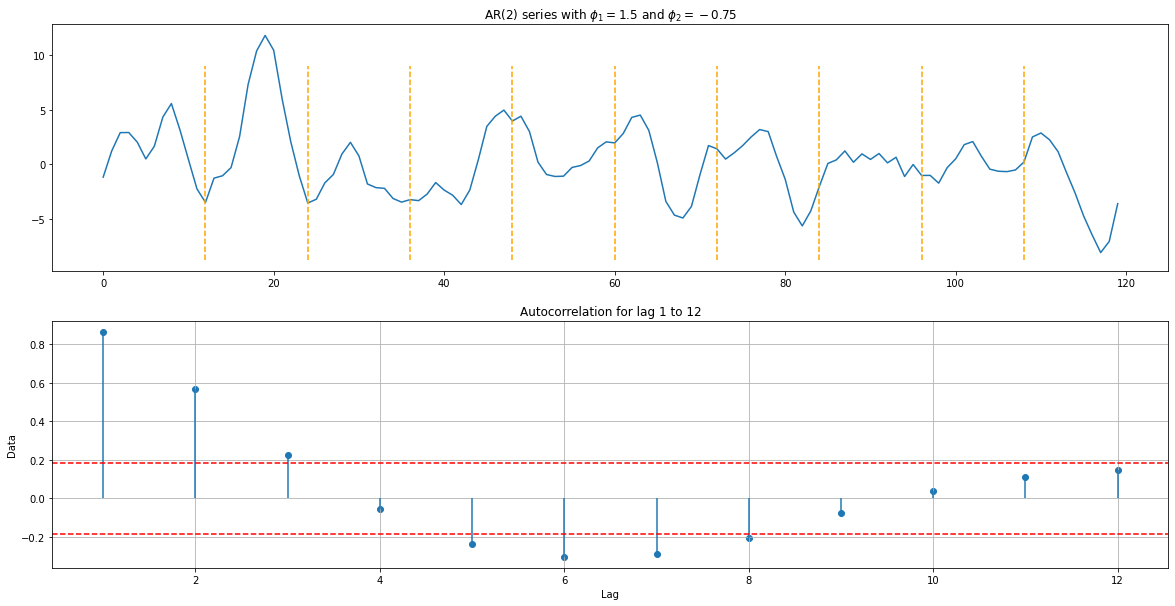

In [9]:
# draw an AR(2) process with the pseudoperiod
phis = [1.5, -0.75]
Y = list(AR_2_sequence(phis, n=120))

theta = np.arccos(phis[0]/(2 * np.sqrt(-phis[1])))
quasiperiod = 2*np.pi/theta

periods = []
period = quasiperiod
while(period <= len(x)):
    periods.append(period)
    period += quasiperiod
#print(periods)
ylims = ax[0].get_ylim()
#print(ylims)

fig, ax = plt.subplots(2, 1, figsize=(20,10))
ax[0].set_title(f'AR(2) series with $\\phi_1={phis[0]}$ and $\\phi_2={phis[1]}$')
ax[0].plot(x, Y)
ax[0].vlines(periods, ylims[0], ylims[1], color='orange', linestyle='--')
plt.plot()
    
# now we can plot N lags using the acf
samples = Y
N = 12
xs = [k+1 for k in list(range(N))]
ys = acf(samples, lim=N)
ax[1].scatter(xs, ys)
ax[1].vlines(xs, 0, ys)
ax[1].axhline(2/np.sqrt(len(samples)), linestyle='--', color="r")
ax[1].axhline(-2/np.sqrt(len(samples)), linestyle='--', color="r")

plt.title(f'Autocorrelation for lag 1 to {N}')
plt.ylabel('Data')
plt.xlabel('Lag')
plt.grid(True)
    
plt.plot()

_ = plt.show()